In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import locale

In [2]:
licenciaturas = {'Ano': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
                 'Presencial': [933955, 932843, 919520, 925919, 929024, 909930, 884183, 849146, 814676, 790927, 678955, 645635, 600158, 569063],
                 'EaD': [426241, 429549, 450034, 451211, 541023, 565518, 640327, 743468, 816888, 899217, 987229, 1004915, 1071858, 1144039]
    }

In [3]:
df_li_cad = pd.DataFrame(licenciaturas)

In [4]:
# Filtrar os dados apenas para o ano de 2023
df_2023 = df_li_cad[df_li_cad['Ano'] == 2023].iloc[0] # Pegar a linha de 2023.

In [5]:
# Extrair os valores do df_2023
m_p = df_2023['Presencial']
m_ead = df_2023['EaD']
total_ml = m_p + m_ead

In [6]:
# Calculando os percentuais
perc_p = (m_p / total_ml) * 100
perc_ead = (m_ead / total_ml) * 100

In [7]:
# Criar um DataFrame para a plotagem
data_plot = pd.DataFrame({'Modalidade': ['Presencial', 'EaD'],
                         'Matriculas': [m_p, m_ead],
                         'Percentual': [perc_p, perc_ead]})

In [8]:
data_plot

,Modalidade,Matriculas,Percentual
0,Presencial,569063,33.218279
1,EaD,1144039,66.781721


In [9]:
# Configuração do locale para formatação numérica
try:
    locale.setlocale(locale.LC_NUMERIC, 'pt_BR.UTF-8')
except locale.Error:
    print("Locale 'pt_BR.UTF-8' não encontrado. Tentando 'pt_BR'.")
    try:
        locale.setlocale(locale.LC_NUMERIC, 'pt_BR')
    except locale.Error:
        print("Locale 'pt_BR' também não encontrado. Usando locale padrão do sistema.")
        locale.setlocale(locale.LC_NUMERIC, '')

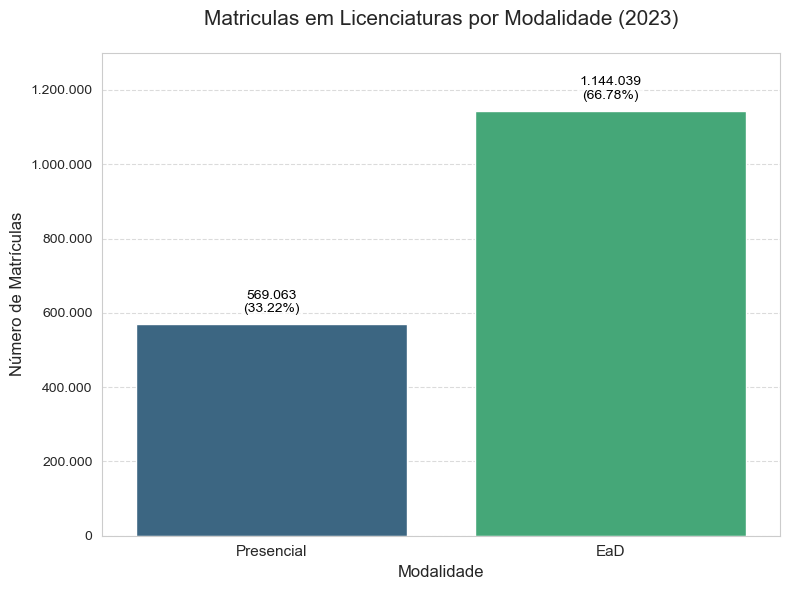

In [14]:
# Criando a gráfico
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")

# Criando o gráfico de barras

ax = sns.barplot(
    x='Modalidade',
    y='Matriculas',
    hue='Modalidade',
    data=data_plot,
    legend=False,
    palette= 'viridis'
)

# Adicionar rótulos (Absoluto e Percentual)

for index, row in data_plot.iterrows():
    # Valor absoluto formatado
    abs_val_formated = f"{int(row['Matriculas']):n}"
    # Texto a ser exibido: valor absoluto + Percentual
    text_to_display = f"{abs_val_formated}\n({row['Percentual']:.2f}%)"
    # Posição do texto acima da barra

    ax.text(index, row['Matriculas'] + (ax.get_ylim()[1] * 0.02), # Pequeno offset vertical
            text_to_display,
            ha='center', va='bottom', fontsize=10, color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2))

# Adicionar o tatal geral do ano no título ou um uma anotação separada
# Como o título já menciona a Figura 9 com o total, podemos mantê-lo simples

total_geral_str = f"{int(total_ml):n}"
ax.set_title(f'Matriculas em Licenciaturas por Modalidade (2023)', fontsize=15, pad=20)
ax.set_xlabel('Modalidade', fontsize=12)
ax.set_ylabel('Número de Matrículas', fontsize=12)
ax.set_ylim(0, 1300000)
# Formtação do eixo Y principal (número de matrículas) com ponto de milhar
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'.replace(',','.')))
ax.tick_params(axis='y', labelsize=10)    
ax.tick_params(axis='x', labelsize=11)

# Remover a grade horizontal para uma aparência mais limpa
ax.grid(axis='x', linestyle='', alpha=0) # Remove a grade vertical
ax.grid(axis='y', linestyle='--', alpha=0.7) # Mantém a grade horizontal suave

plt.tight_layout()
plt.savefig('Figura 9 - Número de matrículas em licenciaturas por modalidade de ensino em 2023', dpi=300, bbox_inches='tight')
plt.show()



In [15]:
m_grau_acad = {'Ano': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
              'Bacharelado': [4229441, 4499991, 4712086, 4922677, 5318082, 5523679, 5556667, 5669424, 5695972, 5670208, 5566576, 5697601, 5927464, 6191765],
              'Licenciatura': [1360196, 1362392, 1369554, 1377130, 1470047, 1475448, 1524510, 1592614, 1631564, 1690144, 1666184, 1650550, 1672016, 1713102],
              'Tecnologico': [782270, 871544, 945970, 996574, 1030132, 1010239, 946319, 999289, 1098161, 1223919, 1435271, 1618888, 1813574, 2030236]}

In [16]:
df_grau_a = pd.DataFrame(m_grau_acad)

In [17]:
# Filtrando os dados para o ano de 2023 (Slice pela coluna 'Ano' onde o(s) valore(s) é(são) iguai(s) a 2023)
df_2023_grau = df_grau_a[df_grau_a['Ano'] == 2023].iloc[0]

In [18]:
# Visualizando o conteúdo da variável
df_2023_grau

Ano                2023
Bacharelado     6191765
Licenciatura    1713102
Tecnologico     2030236
Name: 13, dtype: int64

In [19]:
# Extrair os valores de matrículas de 2023
matriculas = {'Licenciatura': df_2023_grau['Licenciatura'],
             'Bacharelado': df_2023_grau['Bacharelado'],
             'Tecnologico': df_2023_grau['Tecnologico']}

In [20]:
# Visualizando o conteúdo da variável (dicionário Python)
matriculas

{'Licenciatura': 1713102, 'Bacharelado': 6191765, 'Tecnologico': 2030236}

In [21]:
# Criando uma série Pandas para facilitar
s_matriculas = pd.Series(matriculas)

In [22]:
type(s_matriculas)

pandas.core.series.Series

In [23]:
# Criando uma variável com o tatal de matrículas
total_matriculas = s_matriculas.sum()

In [24]:
# Calcular os percentuais
percentuais = (s_matriculas / total_matriculas) * 100

In [25]:
# Saída da variavel com as porcentagens por cada item da Série Pandas.
percentuais

Licenciatura    17.242921
Bacharelado     62.322102
Tecnologico     20.434977
dtype: float64

In [26]:
# Preparar dados para plotagem
labels = s_matriculas.index
sizes = s_matriculas.values

In [27]:
# Visualização o tipo de dado da variável
type(labels)

pandas.core.indexes.base.Index

In [28]:
# Visualização o tipo de dado da variável
type(sizes)

numpy.ndarray

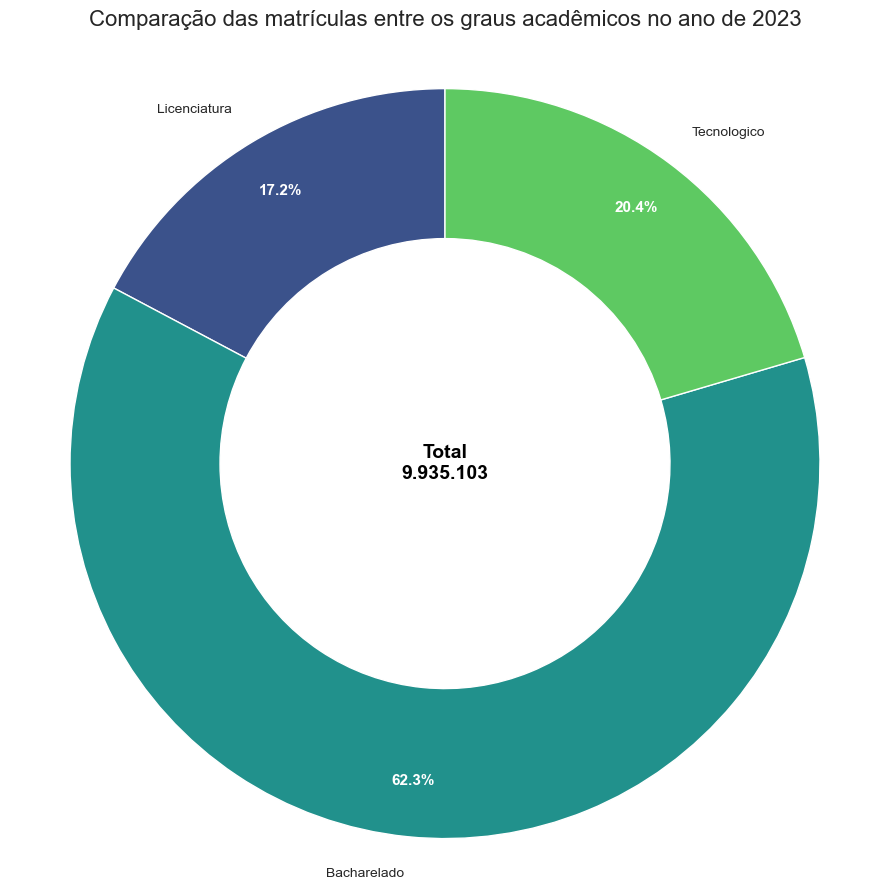

In [29]:
# Criação do Gráfico de Rosca
fig, ax = plt.subplots(figsize=(9, 9)) # Ajuste do tamanho da figura

# Cores para os segmentos (escolha cores que contrastem bem)
# Sugestão de paleta: https://seaborn.pydata.org/tutorial/color_palettes.html
colors = sns.color_palette("viridis", len(labels)) # Exemplo: paleta 'viridis'

# Criando o gráfico de rosca

# wedgeprops: controla o buraco central
# autopct: formata os percentuais que aparecem no gráfico
# pctdistance: distância dos percentuais do centro
# startangle: ângulo inicial para o primeiro segmento (geral 90 para começar "em cima")

wedgets, texts, autotexts = ax.pie(sizes,
                                  labels=labels,
                                  autopct= lambda p: f'{p:.1f}%', # formato percentual
                                  pctdistance=0.85, # Distância do rótulo percentual
                                  colors=colors,
                                  wedgeprops=dict(width=0.4, edgecolor='w'), # Largura da fatia e cor da borda
                                  startangle=90)

# Centralizar os rótulos de porcentagem
for autotext in autotexts:
    autotext.set_color('white') # Cor do texto de porcentagem
    autotext.set_fontsize(11) # Tamanho da fonte do percentual
    autotext.set_fontweight('bold') # Negrito

# Adicionar o número total no centro do gráfico de rosca

total_matriculas_formatado = f"{int(total_matriculas):n}"
ax.text(0,0, f'Total\n{total_matriculas_formatado}',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14,
        fontweight='bold',
        color='black')

ax.set_title('Comparação das matrículas entre os graus acadêmicos no ano de 2023', fontsize=16, pad=20)
ax.axis('equal') # Garante que o círculo seja desenhado com um círcula

plt.tight_layout()
plt.savefig('Figura 10 - Comparação das matrículas entre os graus acadêmicos no ano de 2023.png', dpi=300)
plt.show()


In [30]:
m_ead = {'Ano': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
        'Bacharelado': [269055, 300034, 359910, 361512, 416507, 436078, 466563, 550325, 671969, 841429, 1124647, 1457355, 1780445, 2080938],
        'Licenciatura': [426241, 429549, 450034, 451211, 541023, 565518, 640327, 743468, 816888, 899217, 987229, 1004915, 1071858, 1144039],
        'Tecnológico': [235765, 263970, 304221, 341177, 384642, 392674, 388301, 464354, 568873, 710827, 995363, 1255086, 1472810, 1673875]}


In [31]:
m_ead_ga = pd.DataFrame(m_ead)

In [46]:
type(m_ead_ga)

pandas.core.frame.DataFrame

In [32]:
# Filtrando os dados para o ano de 2023
m_ead_2023 = m_ead_ga[m_ead_ga['Ano'] == 2023].iloc[0]

In [48]:
# Sáida da variável m_ead_2023
m_ead_2023

Ano                2023
Bacharelado     2080938
Licenciatura    1144039
Tecnológico     1673875
Name: 13, dtype: int64

In [34]:
# Construíndo um dicionário com os valores de m_ead_2023
matriculas_ead_2023 = {'Bacharelado': m_ead_2023['Bacharelado'],
                      'Licenciatura': m_ead_2023['Licenciatura'],
                      'Tecnológico': m_ead_2023['Tecnológico']}

In [44]:
type(matriculas_ead_2023)

dict

In [36]:
# Criar uma sério Pandas para facilitar
s_matriculas_ead = pd.Series(matriculas_ead_2023)

In [47]:
s_matriculas_ead

Bacharelado     2080938
Licenciatura    1144039
Tecnológico     1673875
dtype: int64

In [37]:
# Criando uma variável 'total_ead_2023' e atribuíndo a soma das matrículas dos graus acadêmicos.
total_ead_2023 = s_matriculas_ead.sum()

In [38]:
total_ead_2023

4898852

In [39]:
# Calcular os percentuais por grau acadêmico
percentuais_ead = (s_matriculas_ead / total_ead_2023) * 100

In [40]:
percentuais_ead

Bacharelado     42.478074
Licenciatura    23.353206
Tecnológico     34.168720
dtype: float64

In [41]:
# Preparando dados para plotagem
labels_ead = s_matriculas_ead.index
sizes_ead = s_matriculas_ead.values

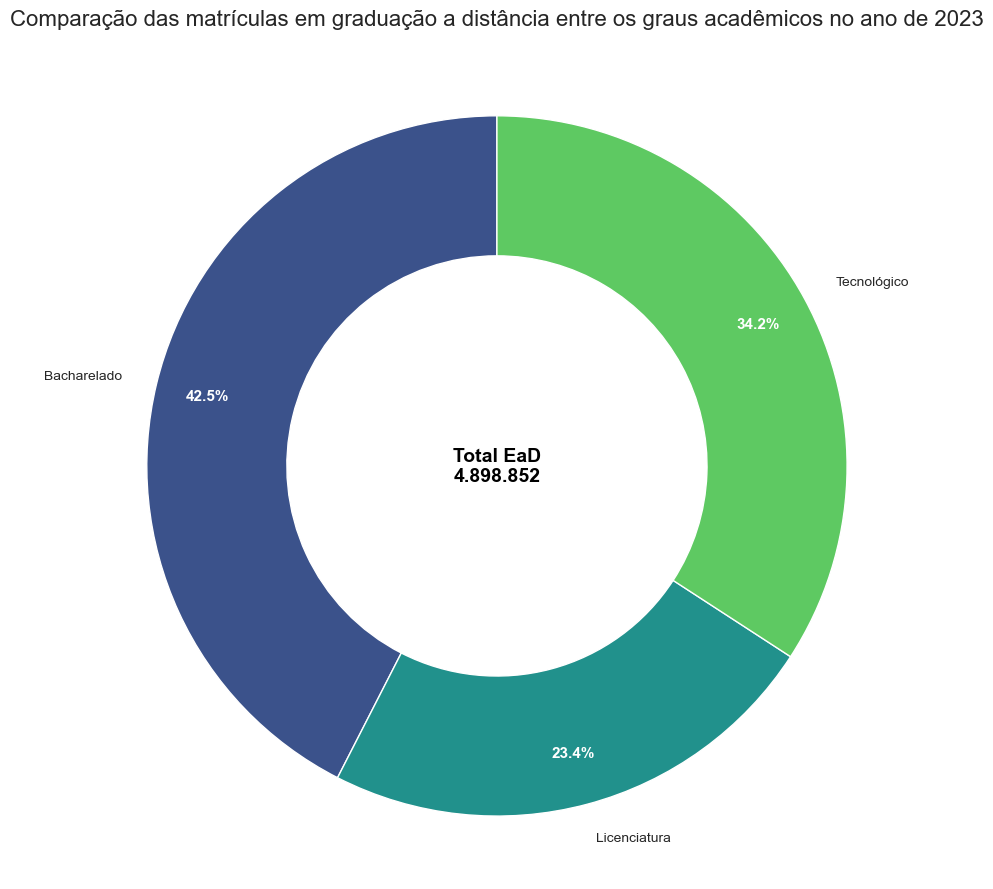

In [71]:
# Criação do gráfico de rosca.
fig, ax = plt.subplots(figsize=(9,9))

colors_ead = sns.color_palette("viridis", len(labels_ead))

wedges, texts, autotexts = ax.pie(sizes_ead,
                                 labels=labels_ead,
                                 autopct=lambda p: f'{p:.1f}%',
                                 pctdistance=0.85, # Distância do rótulo de percentual do centro
                                 colors=colors_ead,
                                 wedgeprops=dict(width=0.4, edgecolor='w'), # Largura da fatia e cor da borda
                                 startangle=90) # Começa o primeiro segmento do topo.

# Formatando e centralizando os rótulos das porcentagens

for autotext in autotexts:
    autotext.set_color('white') # Cor do texto de porcentagem
    autotext.set_fontsize(11) # Tamanho da fonte do percentual
    autotext.set_fontweight('bold') # Negrito

# Adicionando o número total de matrículas  EaD no centro do gráfico de rosca

total_ead_2023_formatado = f"{int(total_ead_2023):n}"
ax.text(0,0, f'Total EaD\n{total_ead_2023_formatado}',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14,
        fontweight='bold',
        color='black')
ax.set_title('Comparação das matrículas em graduação a distância entre os graus acadêmicos no ano de 2023', fontsize=16, pad=20)
ax.axis('equal')

plt.tight_layout()
plt.savefig('(Figura 11 - Comparação das matrículas em graduação a distância entre os graus acadêmicos no ano de 2023.)', dpi=300)
plt.show()